
 
# Ensembles and Random Forests
 
_Author: Nick Qi_


---

In [1]:
import os 
import pickle
import matplotlib.pyplot as plt                     
import numpy as np                                    
import pandas as pd
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from matplotlib.legend_handler import HandlerLine2D

## Random Forest 


- Use a `RandomForestClassifier` estimator to predict who survives on the Titanic. 

In [30]:
titanic = pd.read_csv("titanic.csv")

In [31]:
titanic.shape

(891, 12)

In [32]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\nqi200\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nqi200\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


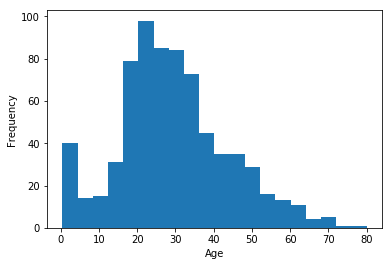

In [33]:
plt.hist(titanic.Age, bins =20)
plt.xlabel("Age")
plt.ylabel("Frequency");

In [46]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
titanic['Age'].fillna((titanic['Age'].mean()), inplace=True)

In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [49]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
titanic.shape

(891, 12)

In [52]:
#Use only numerical values first 
feature_cols =['Pclass', 'Age', 'SibSp','Parch','Fare']
X_titanic = titanic.loc[:, feature_cols]
y_titanic = titanic.loc[:,'Survived']


In [53]:
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic,
                                                                                    y_titanic,
                                                                                    test_size =0.3
                                                                                   )

In [54]:
rfc_titanic = RandomForestClassifier(criterion='gini', 
                                     n_estimators=100, random_state=1)

rfc_titanic

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [55]:
rfc_titanic.fit(X_titanic_train, y_titanic_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [57]:
rfc_y_pred = rfc_titanic.predict(X_titanic_test)

In [58]:
# Confusion matrix 
conf_matrix_rfc_test = metrics.confusion_matrix(rfc_y_pred, y_titanic_test)

conf_matrix_rfc_test

array([[119,  45],
       [ 49,  55]], dtype=int64)

In [59]:
# Accuracy 
accuracy_rfc_test = metrics.accuracy_score(rfc_y_pred, y_titanic_test)

accuracy_rfc_test

0.6492537313432836

In [60]:
pd.DataFrame({'feature': feature_cols,'importance':rfc_titanic.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
4,Fare,0.409163
1,Age,0.377738
0,Pclass,0.102592
2,SibSp,0.060839
3,Parch,0.049668


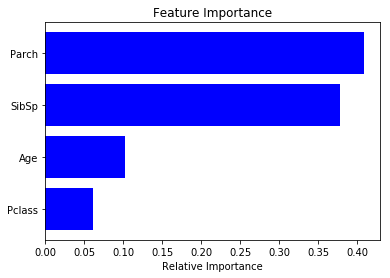

In [65]:
importances = rfc_titanic.feature_importances_
indices = np.argsort(importances)[::-1] #sort backwards
top_indices = indices[0:4][::-1]


plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(top_indices)), importances[top_indices], color = 'b', align = 'center')
labels = feature_cols
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices)), labels)
plt.xlabel('Relative Importance');

# Gradiant Boosting 

In [66]:
gbm_titanic = GradientBoostingClassifier(n_estimators=100,
                                    learning_rate=1,
                                    max_depth=1,
                                    random_state=1
                                   )

In [67]:
gbm_titanic.fit(X_titanic_train, y_titanic_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [68]:
gbm_y_pred = gbm_titanic.predict(X_titanic_test)

In [69]:
# Confusion matrix
conf_matrix_gbm_test = metrics.confusion_matrix(gbm_y_pred, y_titanic_test)

conf_matrix_gbm_test

array([[127,  46],
       [ 41,  54]], dtype=int64)

In [70]:
# Accuracy 
accuracy_gbm_test = metrics.accuracy_score(gbm_y_pred, y_titanic_test)

accuracy_gbm_test

0.6753731343283582

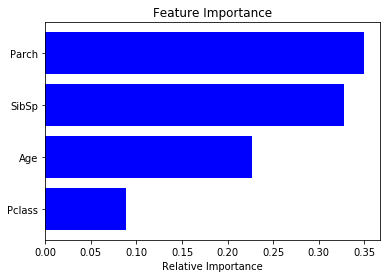

In [71]:
importances = gbm_titanic.feature_importances_
indices = np.argsort(importances)[::-1] #sort backwards
top_indices = indices[0:4][::-1]


plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(top_indices)), importances[top_indices], color = 'b', align = 'center')
labels = feature_cols
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices)), labels)
plt.xlabel('Relative Importance');

# Random Forest Tuning

In [72]:
rfc_titanic.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)>

### Tuning n_estimators

One important tuning parameter is **n_estimators**, which represents the number of trees that should be grown. This should be a large enough value that the error seems to have "stabilized."

### Tuning max_features

The other important tuning parameter is **max_features**, which represents the number of features that should be considered at each split.

In [77]:
n_estimators = [int(x) for x in np.linspace(start=1, stop=200, num=2)]

max_features =['auto','sqrt']

# Maximum number of levels in tree.
max_depth = [int(x) for x in np.linspace(start=10, stop=110, num=11) ]

# Minimum number of samples required to split a node.
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node.
min_samples_leaf = [1, 2, 4]


# Create the random grid.
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [1, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [78]:
rfc_random = RandomizedSearchCV(estimator=rfc_titanic,
                                  param_distributions=random_grid,
                                  n_iter = 100,
                                  cv = 3,
                                  verbose=0,
                                  random_state= 1,
                                  n_jobs = -1
                                 )
rfc_random.fit(X_titanic_train, y_titanic_train)
rfc_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 70}

In [79]:
optimized_rfc_titanic = RandomForestClassifier(criterion = 'gini',
                                          n_estimators = 200,
                                          min_samples_split = 5,
                                          min_samples_leaf = 4,
                                          max_features = 'sqrt',
                                          max_depth = 70,
                                          random_state = 1)
optimized_rfc_titanic.fit(X_titanic_train, y_titanic_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=70, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [81]:
optimized_rfc_y_pred = optimized_rfc_titanic.predict(X_titanic_test)

optimized_rfc_y_pred[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [82]:
metrics.accuracy_score(y_titanic_test, optimized_rfc_y_pred)

0.7014925373134329

In [83]:
metrics.confusion_matrix(y_titanic_test, optimized_rfc_y_pred)

array([[137,  31],
       [ 49,  51]], dtype=int64)

# Gradient Boosting

In [103]:
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [1,2,4,8,16,32,64,100,200]
max_depth = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1,X_titanic.shape[1]))

In [104]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'learning_rate': learning_rate}

random_grid

{'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200], 'max_features': [1, 2, 3, 4], 'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]), 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]}


In [105]:
gbm_random = RandomizedSearchCV(estimator=gbm_titanic,
                                  param_distributions=random_grid,
                                  n_iter = 50,
                                  cv = 3,
                                  verbose=0,
                                  random_state= 1,
                                  n_jobs = -1
                                 )
gbm_random.fit(X_titanic_train, y_titanic_train)
gbm_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 2,
 'max_depth': 1.0,
 'learning_rate': 0.1}

In [106]:
optimized_gbm_titanic = GradientBoostingClassifier(n_estimators = 100,
                                                   learning_rate = 0.1,
                                                   min_samples_split = 5,
                                                   min_samples_leaf = 2,
                                                    max_features = 2,
                                                    max_depth =1,
                                                   random_state = 1)
optimized_gbm_titanic.fit(X_titanic_train, y_titanic_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [107]:
optimized_gbm_y_pred = optimized_gbm_titanic.predict(X_titanic_test)

optimized_gbm_y_pred[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [108]:
metrics.accuracy_score(y_titanic_test, optimized_gbm_y_pred)

0.7052238805970149

In [109]:
metrics.confusion_matrix(y_titanic_test, optimized_gbm_y_pred)

array([[140,  28],
       [ 51,  49]], dtype=int64)